# Object Classification Based on Image with CNN #

* Convolutional Neural Network will be used as object classifier based on their images. CIFAR-10

In [ ]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other Stuff:
import random
import datetime

## Data Load ##

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

170500096/170498071 [==============================] - 64s 0us/step
X_train (50000, 32, 32, 3)
y_train (50000, 1)
X_test (10000, 32, 32, 3)
y_test (10000, 1)


## Data Visualization ##

array([1], dtype=uint8)

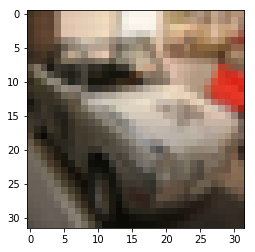

In [3]:
i = 302
plt.imshow(X_train[i])
y_train[i]

C:\Users\Mafeus\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


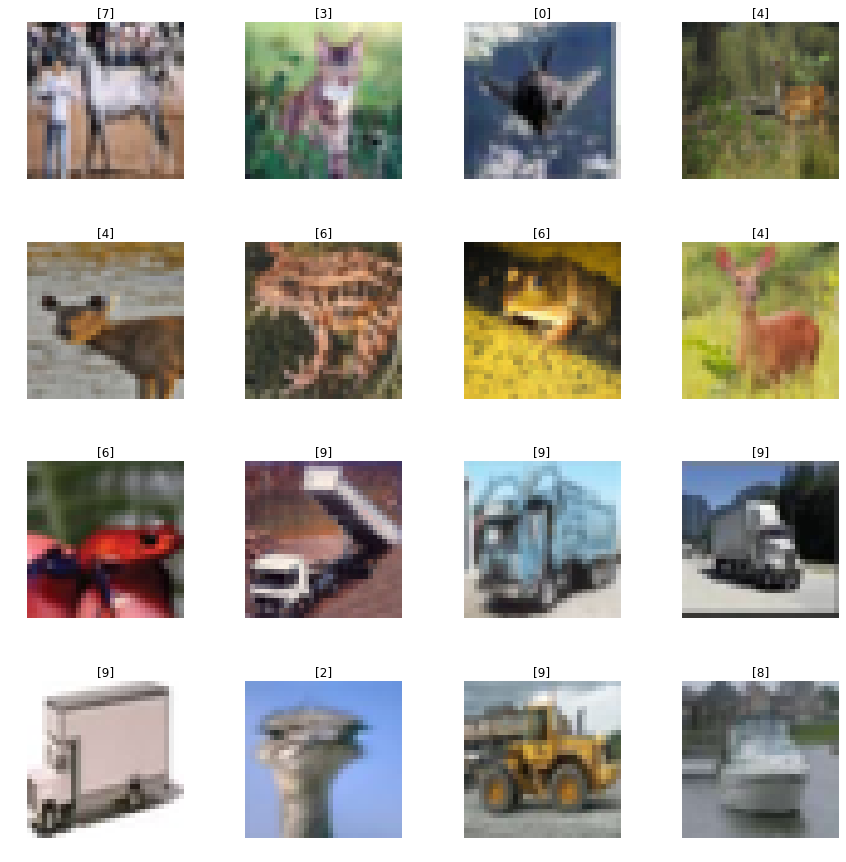

In [4]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

## Data Processing ##

In [5]:
# Needed in order to use division:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# Encode Classes (One Hot Encoder):
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [7]:
# Normalization:
X_train = X_train/255
X_test = X_test/255

In [8]:
input_shape = X_train.shape[1:]
print(input_shape)

(32, 32, 3)


## Tensorflow - Neural Network Setup ##

In [9]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
# Network Setup

cnn = models.Sequential()

# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3)) # avoid over fitting (drop 30%)

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [11]:
epochs = 100
batch_size = 512

# Change learning rate epoch to epoch with decay (to avoid missing objective - gradient minimum global )
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), # 0.0000001
            loss ='categorical_crossentropy', metrics =['accuracy'])

history = cnn.fit(X_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/100
50000/50000 [==============================] - 243s 5ms/sample - loss: 2.0620 - accuracy: 0.2412
Epoch 2/100
50000/50000 [==============================] - 151s 3ms/sample - loss: 1.8138 - accuracy: 0.3428
Epoch 3/100
50000/50000 [==============================] - 151s 3ms/sample - loss: 1.7216 - accuracy: 0.3775
Epoch 4/100
50000/50000 [==============================] - 149s 3ms/sample - loss: 1.6632 - accuracy: 0.3959
Epoch 5/100
50000/50000 [==============================] - 151s 3ms/sample - loss: 1.6127 - accuracy: 0.4158
Epoch 6/100
50000/50000 [==============================] - 151s 3ms/sample - loss: 1.5687 - accuracy: 0.4305
Epoch 7/100
50000/50000 [==============================] - 152s 3ms/sample - loss: 1.5286 - accuracy: 0.4459
Epoch 8/100
50000/50000 [==============================] - 152s 3ms/sample - loss: 1.4993 - accuracy: 0.4604
Epoch 9/100
50000/50000 [==============================] - 150s 3ms/sample - loss: 1.4640 - accuracy: 0.4705
Epoch 10/100
50000/

50000/50000 [==============================] - 150s 3ms/sample - loss: 0.6124 - accuracy: 0.7844
Epoch 76/100
50000/50000 [==============================] - 151s 3ms/sample - loss: 0.6025 - accuracy: 0.7891
Epoch 77/100
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.5975 - accuracy: 0.7912
Epoch 78/100
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.5938 - accuracy: 0.7921
Epoch 79/100
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.5815 - accuracy: 0.7948
Epoch 80/100
50000/50000 [==============================] - 149s 3ms/sample - loss: 0.5794 - accuracy: 0.7967
Epoch 81/100
50000/50000 [==============================] - 149s 3ms/sample - loss: 0.5690 - accuracy: 0.7992
Epoch 82/100
50000/50000 [==============================] - 152s 3ms/sample - loss: 0.5668 - accuracy: 0.8007
Epoch 83/100
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.5585 - accuracy: 0.8031
Epoch 84/100
50000/5000

## Model Error Metrics and Results ##

In [12]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 40s 4ms/sample - loss: 0.6729 - accuracy: 0.7711
Test Accuracy: 0.7710999846458435


In [13]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [14]:
y_test = y_test.argmax(1) # return output structure to sparse

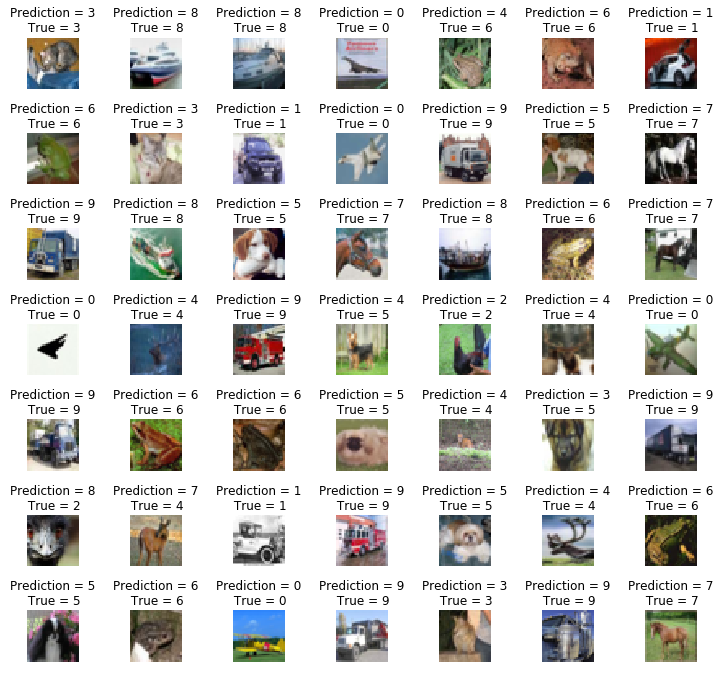

In [15]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

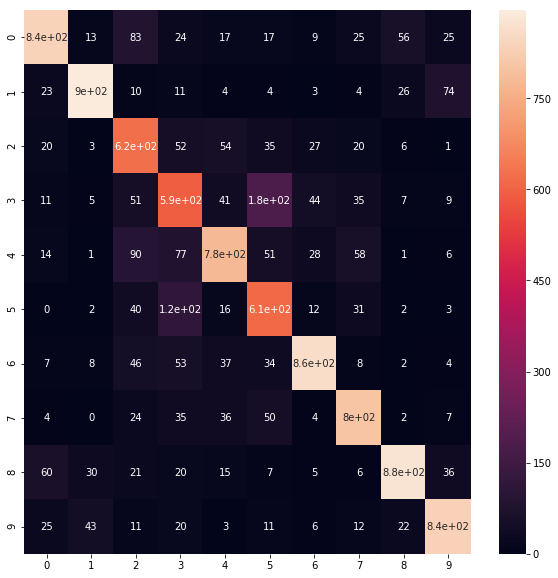

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [17]:
cm

array([[836,  13,  83,  24,  17,  17,   9,  25,  56,  25],
       [ 23, 895,  10,  11,   4,   4,   3,   4,  26,  74],
       [ 20,   3, 624,  52,  54,  35,  27,  20,   6,   1],
       [ 11,   5,  51, 593,  41, 179,  44,  35,   7,   9],
       [ 14,   1,  90,  77, 777,  51,  28,  58,   1,   6],
       [  0,   2,  40, 115,  16, 612,  12,  31,   2,   3],
       [  7,   8,  46,  53,  37,  34, 862,   8,   2,   4],
       [  4,   0,  24,  35,  36,  50,   4, 801,   2,   7],
       [ 60,  30,  21,  20,  15,   7,   5,   6, 876,  36],
       [ 25,  43,  11,  20,   3,  11,   6,  12,  22, 835]], dtype=int64)